<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Meus-Estudos/blob/master/001_Rede_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Redes Neurais e Aprendizagem Profunda**
---


## Exemplo de Treinamento de Rede Neural

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
 
num_classes = 10
 
# input image dimensions
img_rows, img_cols = 28, 28
 
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
# convert class vectors to binary class matrices
y_train_copy = y_train
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


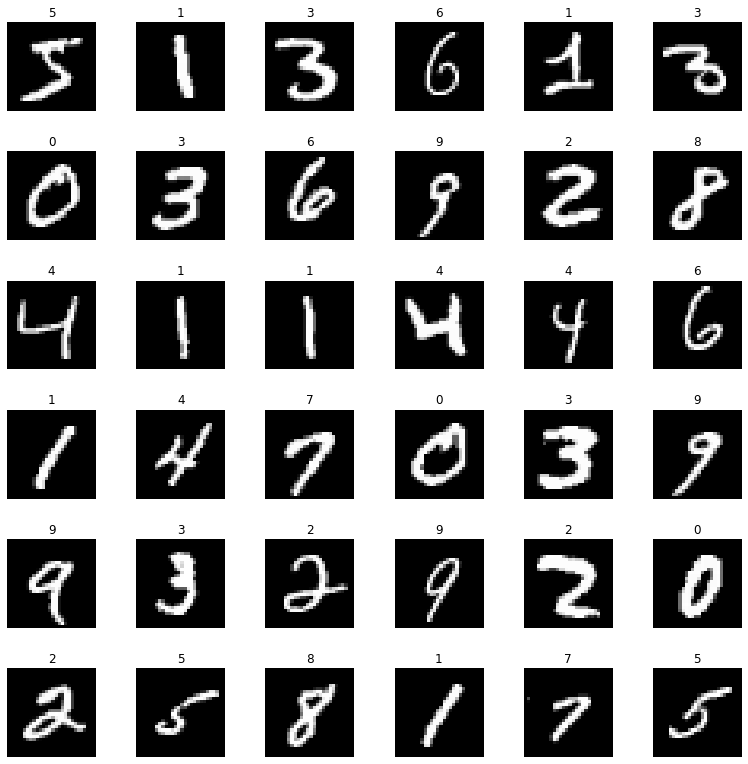

In [2]:
import matplotlib.pyplot as plt
 
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
#fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].axis('off')
    ax[x, y].set_title(y_train_copy[x + y * 6])

In [3]:
 
batch_size = 128
epochs = 12
 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adadelta',
              metrics=['accuracy'])
 
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
 
score = model.evaluate(x_test, y_test, verbose=0)
 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 18s 13ms/step - loss: 2.2863 - accuracy: 0.1353 - val_loss: 2.2481 - val_accuracy: 0.3255
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2282 - accuracy: 0.2440 - val_loss: 2.1794 - val_accuracy: 0.4832
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 2.1565 - accuracy: 0.3521 - val_loss: 2.0876 - val_accuracy: 0.6199
Epoch 4/12
469/469 [==============================] - 6s 12ms/step - loss: 2.0580 - accuracy: 0.4413 - val_loss: 1.9618 - val_accuracy: 0.7041
Epoch 5/12
469/469 [==============================] - 6s 12ms/step - loss: 1.9326 - accuracy: 0.5081 - val_loss: 1.7994 - val_accuracy: 0.7425
Epoch 6/12
469/469 [==============================] - 5s 12ms/step - loss: 1.7765 - accuracy: 0.5573 - val_loss: 1.6049 - val_accuracy: 0.7629
Epoch 7/12
469/469 [==============================] - 5s 11ms/step - loss: 1.6045 - accuracy: 0.5928 - val_loss: 1.3982 - val_accuracy: 0.775